# stars 🌟
classifying stars in Python. 

## Dataset
The dataset used is taken from [here](https://www.kaggle.com/datasets/brsdincer/star-type-classification?resource=download)



### Features
* Temperature (K) 

* Relative Luminosity (L / L☉) (where L☉ denotes the Solar Luminosity (2.82 * 10^26 W))

* Relative Radius (R / R☉) (where R☉ denotes the Solar Radius (7 * 10^10 cm))

* Absolute Magnitude (Mv)

* Color 
    * 'Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'

### Classes

*    Red Dwarf - 0
*    Brown Dwarf - 1
*    White Dwarf - 2
*    Main Sequence - 3
*    Super Giants - 4
*    Hyper Giants - 5


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


<AxesSubplot:>

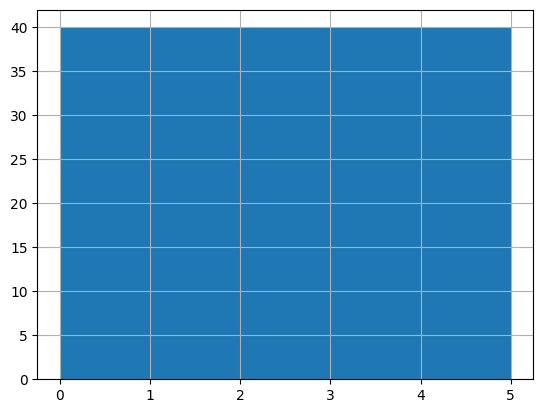

In [10]:
# Lets see how the classes are distributed
classes = df.loc[:,"Type"]
classes.hist(bins = 6)

In [13]:
colors = df.loc[:,"Color"]
colors.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [14]:
spectral_classes = df.loc[:,"Spectral_Class"]
spectral_classes.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)